In [14]:
import pandas as pd
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Bonus: Explorative Data Analysis

In [15]:
# load saved data frames (created by preprocess.py)
df_cat = pd.read_pickle('./text/newsgroups/categories.pkl')
print(df_cat.shape)

df_train = pd.read_pickle('./text/newsgroups/train.pkl')
df_test = pd.read_pickle('./text/newsgroups/test.pkl')
df = pd.concat([df_train, df_test], axis=0)
print(df.shape)

(20, 2)
(18846, 2)


## Dataframe details

In [16]:
df.head()

,tokens,categoryid
0,"[wondering, anyone, could, enlighten, car, saw...",7
1,"[fair, number, brave, soul, upgraded, si, cloc...",4
2,"[well, folk, mac, plus, finally, gave, ghost, ...",4
3,"[weitek, address, phone, number, like, get, in...",1
4,"[article, c5owcb, n3p, world, std, com, tombak...",14


## Word frequency

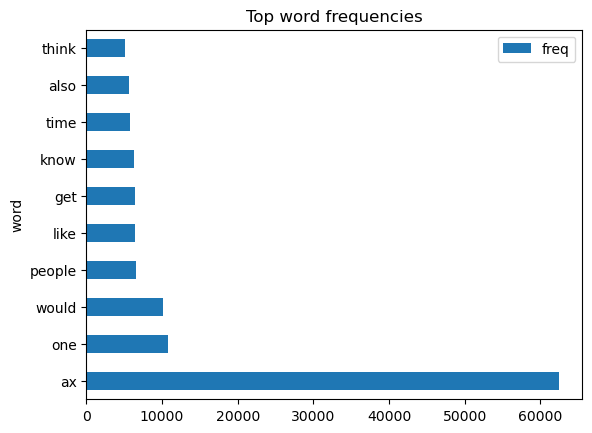

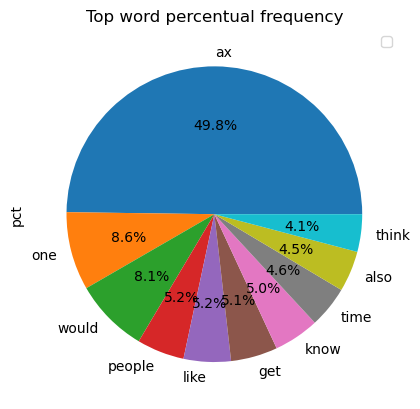

In [56]:
fd = FreqDist(df['tokens'].explode())
unique_tokens = len(fd.keys())
words_freq = { 'word': [], 'freq': [], 'pct': []}
for [word, freq] in fd.most_common(10):
    words_freq['word'].append(word)
    words_freq['freq'].append(freq)
    words_freq['pct'].append(freq/unique_tokens)
df_words_freq = pd.DataFrame(data=words_freq)

ax = df_words_freq.plot.barh(x='word', y='freq')
ax.set_title('Top word frequencies')
ax = df_words_freq.plot.pie(y='pct', autopct='%1.1f%%', labels=df_words_freq['word'])
ax.set_title('Top word percentual frequency')
ax.legend([])
plt.show()

## Wordcloud

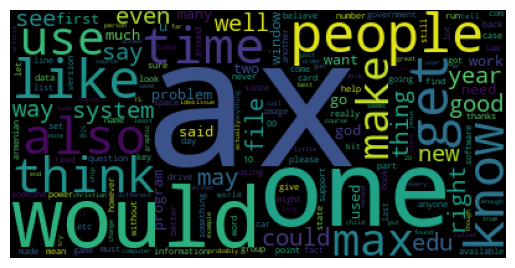

In [18]:
# wordcloud = WordCloud(random_state=2).generate(' '.join(word_list))
wordcloud = WordCloud(random_state=2).generate_from_frequencies(fd)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Articles by category

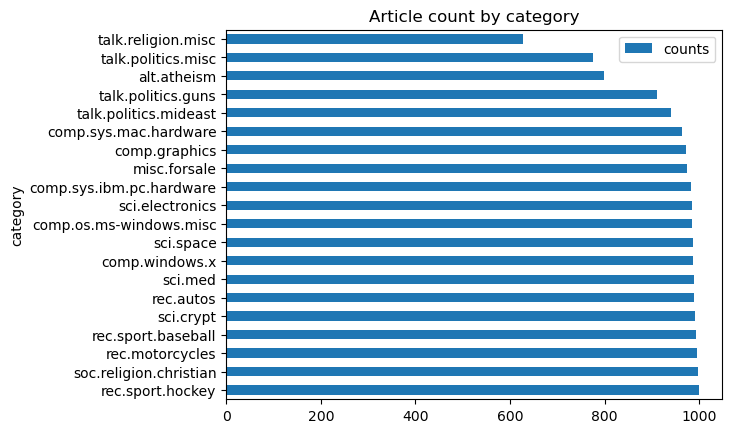

In [28]:
df_counts = df['categoryid'].value_counts().reset_index(name='counts')
df_cnt_by_category = df_counts.merge(df_cat, how='inner', left_on='categoryid', right_on='id')
df_cnt_by_category.rename(columns={'name': 'category'}, inplace=True)
ax = df_cnt_by_category.plot.barh(x='category', y='counts')
ax.set_title('Articles by category')
plt.show()

## Unique tokens per category

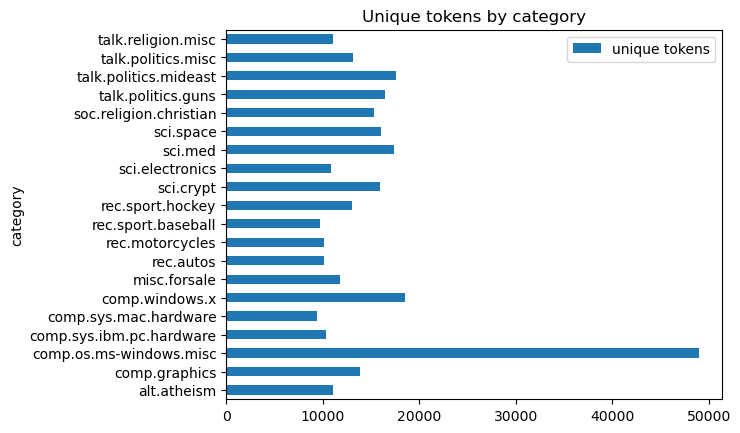

In [30]:
df_unique_tokens_category = df_cat.copy()
unique_tokens = []
for categoryid in df_unique_tokens_category['id'].array:   
    df_per_cat = df[df['categoryid'] == categoryid]
    fd = FreqDist(df_per_cat['tokens'].explode())
    unique_tokens.append(len(fd.keys()))

df_unique_tokens_category['unique tokens'] = unique_tokens
df_unique_tokens_category.rename(columns={'name': 'category'}, inplace=True)
ax = df_unique_tokens_category.plot.barh(x='category', y='unique tokens')
ax.set_title('Unique tokens by category')
plt.show()